<a href="https://colab.research.google.com/github/Arun1374/NYC-Taxi-Trip-Time-Prediction---Capstone-Project/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
# Loading the CSV file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Copy of NYC Taxi Data.csv')

In [4]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [7]:
numeric_columns = df.describe().columns
numeric_columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration'],
      dtype='object')

EDA (Explodatory Data_Analysis)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


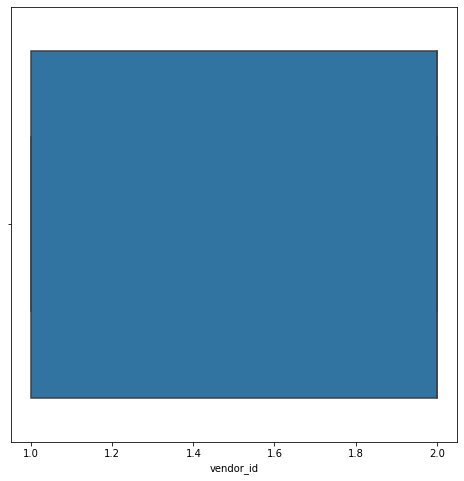

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


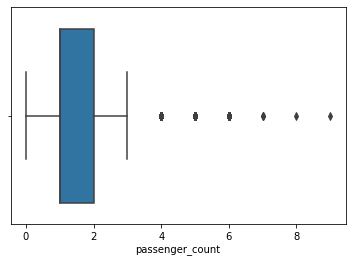

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


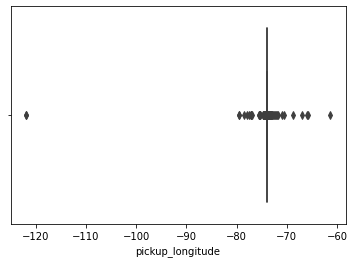

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


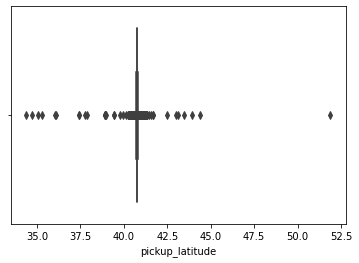

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


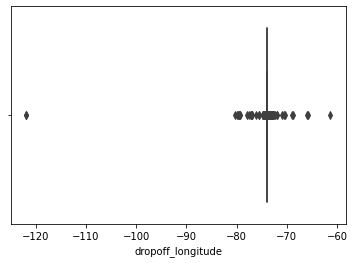

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


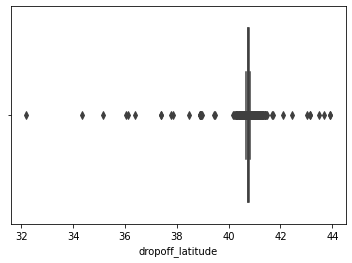

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


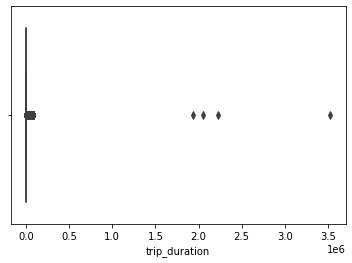

In [8]:
plt.figure(figsize=(8,8))
for i in numeric_columns:
  sns.boxplot(df[i])
  xlabel=(i)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


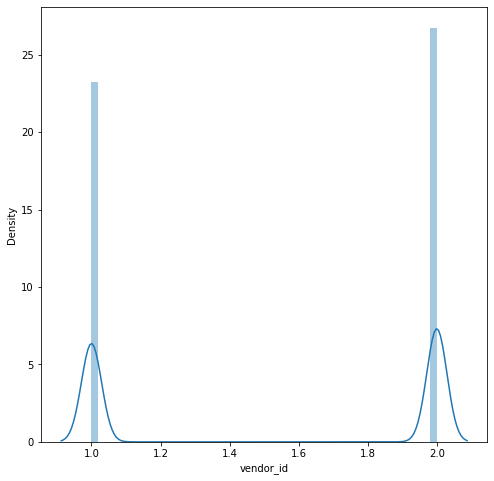

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


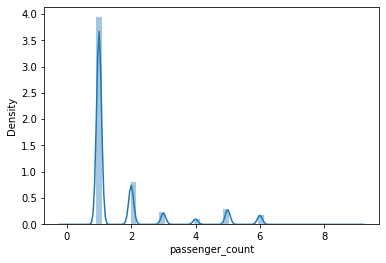

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


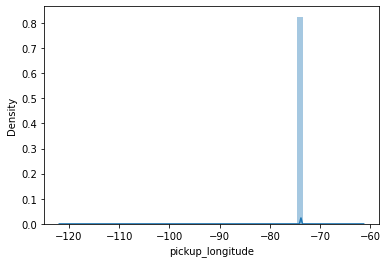

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


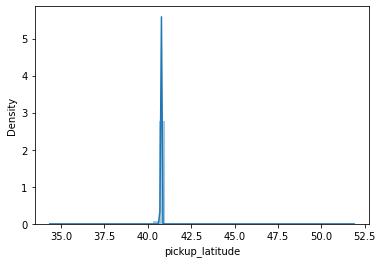

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


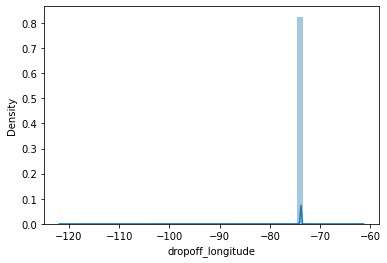

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


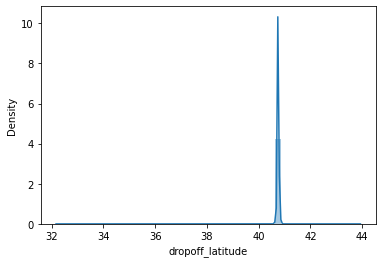

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


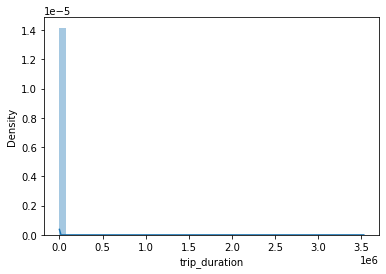

In [9]:
plt.figure(figsize=(8,8))
for i in numeric_columns:
  sns.distplot((df[i]))
  xlabel=(i)
  plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


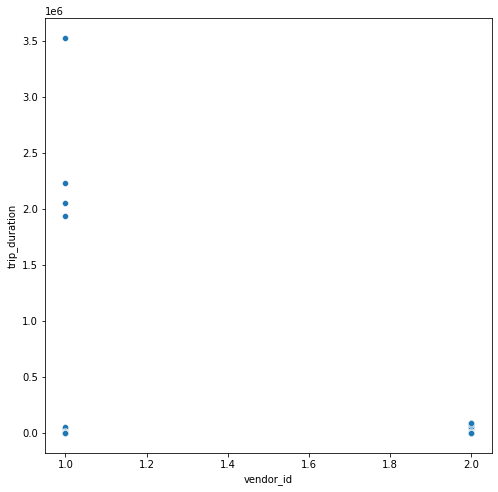

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


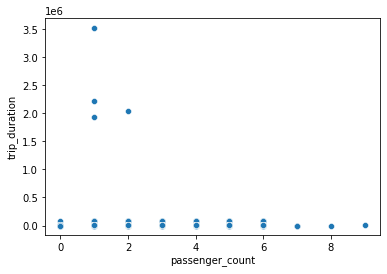

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


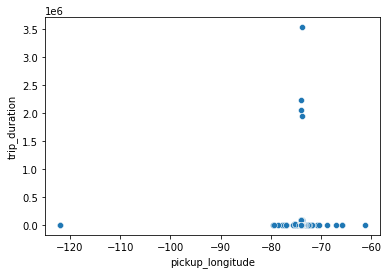

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


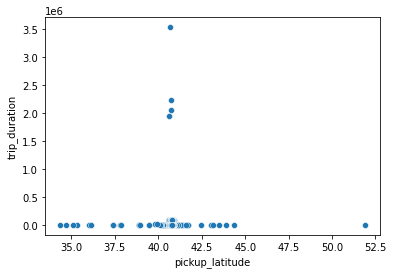

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


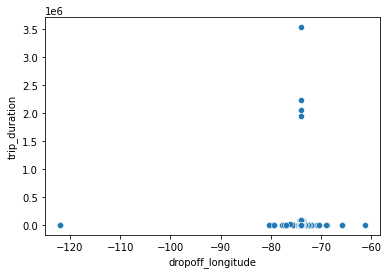

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


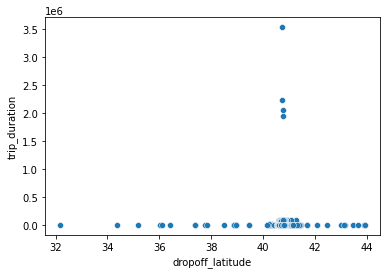

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


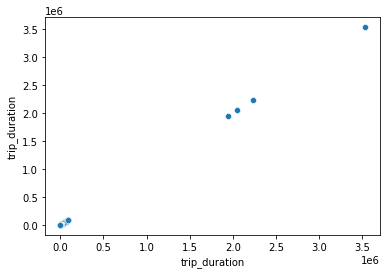

In [10]:
#Co-relation matrics
plt.figure(figsize=(8,8))
for i in numeric_columns:
  sns.scatterplot(df[i],df['trip_duration'])
  xlabel=(i)
  plt.show()

In [11]:
# from the above Scatter plot we can se that there is no Correalation .

In [12]:
df.shape

(1458644, 11)

In [13]:
# columns / features in our Dataset are as below,
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [14]:
# Now, lets check the Datatype , and insert the appropriate Datatype

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


we can see that , Pickup and dropoff date time datatype need to be changed

In [16]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [17]:
#Describe data
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Now, lets create some more columns/features by extracting it

In [18]:
#Extract day 
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()
#Extract month
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month
#Extract hrs
df['pickup_hrs']=df['pickup_datetime'].dt.hour
df['dropoff_hrs']=df['dropoff_datetime'].dt.hour
#Extract Weekday no.
df['pickup_week_no']=df['pickup_datetime'].dt.weekday
df['dropoff_week_no']=df['dropoff_datetime'].dt.weekday


In [19]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hrs,dropoff_hrs,pickup_week_no,dropoff_week_no
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19,2,2
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,13,13,4,4
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,1,1,7,7,6,6
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,6,7,4,4
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,15,16,1,1


# We got the Locations , that is the altitude and the longitude , by using it ,we can find the exact distance. 

In [20]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import haversine as hs

In [22]:
def distance(df):
  lat1,lon1,lat2,lon2=df.pickup_latitude,df.pickup_longitude,df.dropoff_latitude,df.dropoff_longitude
  a=hs.haversine((lat1,lon1),(lat2,lon2))
  return a


In [23]:
df['distance']=df.apply(lambda x : distance(x),axis=1)

In [24]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,pickup_hrs,dropoff_hrs,pickup_week_no,dropoff_week_no,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,3,3,17,17,0,0,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,Tuesday,Tuesday,1,1,11,12,1,1,6.385107
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,4,4,19,19,2,2,1.485500
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,3,3,13,13,5,5,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,13,13,4,4,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,1,1,7,7,6,6,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,6,7,4,4,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,15,16,1,1,1.092565


In [25]:
# adding a feature called speed.
df['speed']=(df['distance']*3600)/df['trip_duration']

# As there are morning,afternoon,evening,night in a day,
lets divide it in 4 parts

In [26]:
def time_of_day(x):
  if x in range(6,12):
    return 'morning'
  elif x in range(12,16):
    return 'afternoon'
  elif x in range(16,22):
    return 'evening'
  else :
    return 'night'


# Add some more columns by using time_of_day function as created above

In [27]:
df['pickup_time_of_day']=df['pickup_hrs'].apply(time_of_day)
df['dropoff_time_of_day']=df['dropoff_hrs'].apply(time_of_day)

In [28]:
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_hrs,dropoff_hrs,pickup_week_no,dropoff_week_no,distance,speed,pickup_time_of_day,dropoff_time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,17,17,0,0,1.498523,11.856445,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805510,9.803672,night,night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385107,10.822216,morning,afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,19,19,2,2,1.485500,12.465738,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,13,13,5,5,1.188590,9.836608,afternoon,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,4,13,13,4,4,1.225082,5.668759,afternoon,afternoon
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,1,7,7,6,6,6.049844,33.251051,morning,morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,4,6,7,4,4,7.824617,36.869921,morning,morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,1,15,16,1,1,1.092565,10.544867,afternoon,evening


In [29]:
df.dtypes

id                             object
vendor_id                       int64
pickup_datetime        datetime64[ns]
dropoff_datetime       datetime64[ns]
passenger_count                 int64
pickup_longitude              float64
pickup_latitude               float64
dropoff_longitude             float64
dropoff_latitude              float64
store_and_fwd_flag             object
trip_duration                   int64
pickup_day                     object
dropoff_day                    object
pickup_month                    int64
dropoff_month                   int64
pickup_hrs                      int64
dropoff_hrs                     int64
pickup_week_no                  int64
dropoff_week_no                 int64
distance                      float64
speed                         float64
pickup_time_of_day             object
dropoff_time_of_day            object
dtype: object

# firstly we saw that , the dataset provided was incomplete
# now by adding some addtional columns, we came into conclusion that, our data set is ready to go.

Now lets do some analysis on the basis of additional data added

In [30]:
df_numerical=df.describe().columns

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


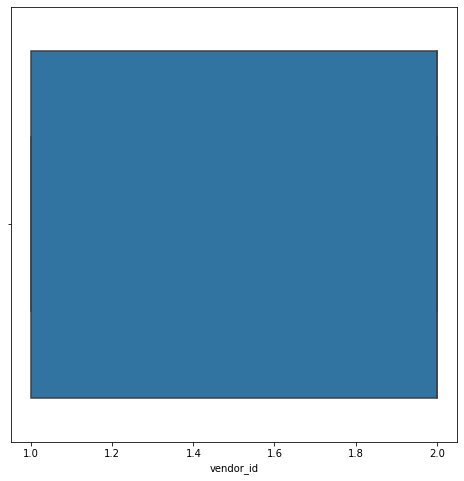

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


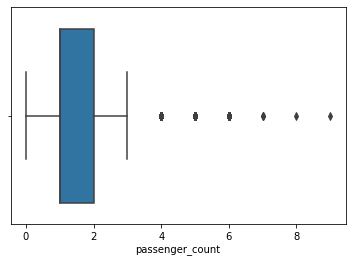

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


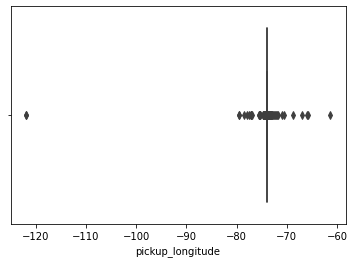

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


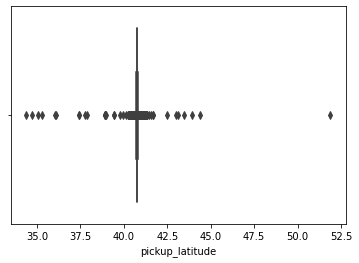

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


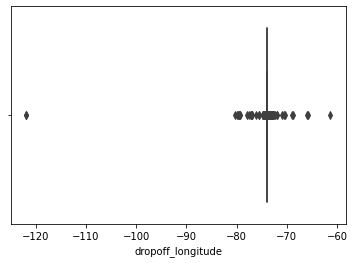

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


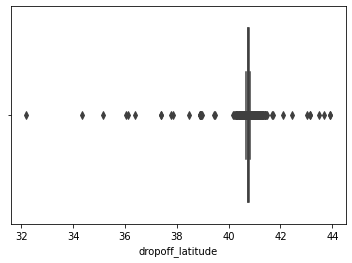

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


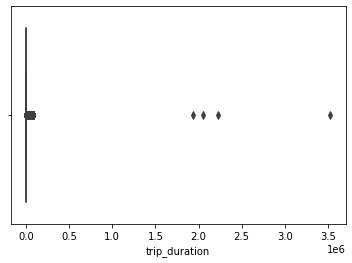

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


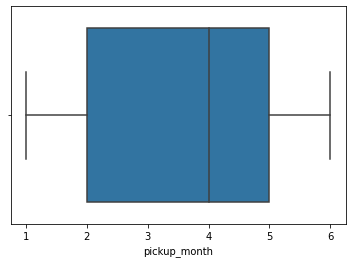

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


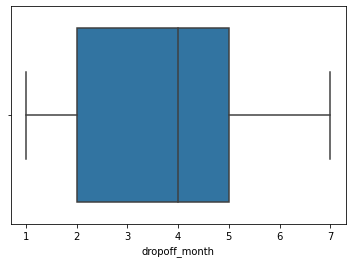

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


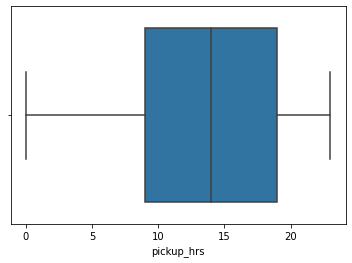

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


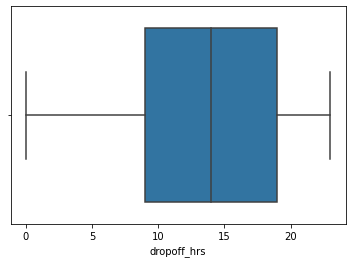

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


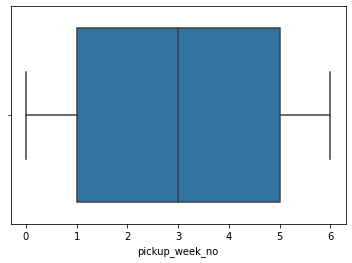

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


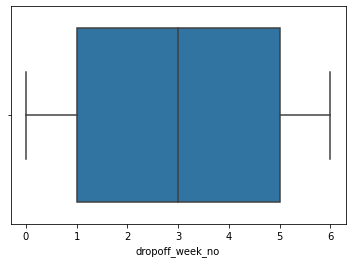

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


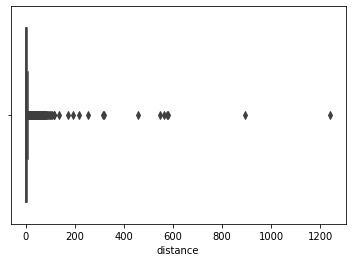

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


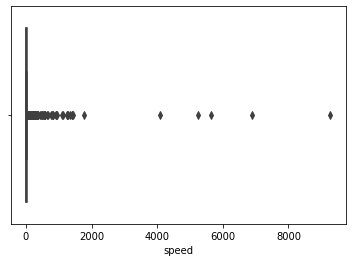

In [31]:
plt.figure(figsize=(8,8))
for i in df_numerical:
  sns.boxplot(df[i])
  xlabel=(i)
  plt.show()

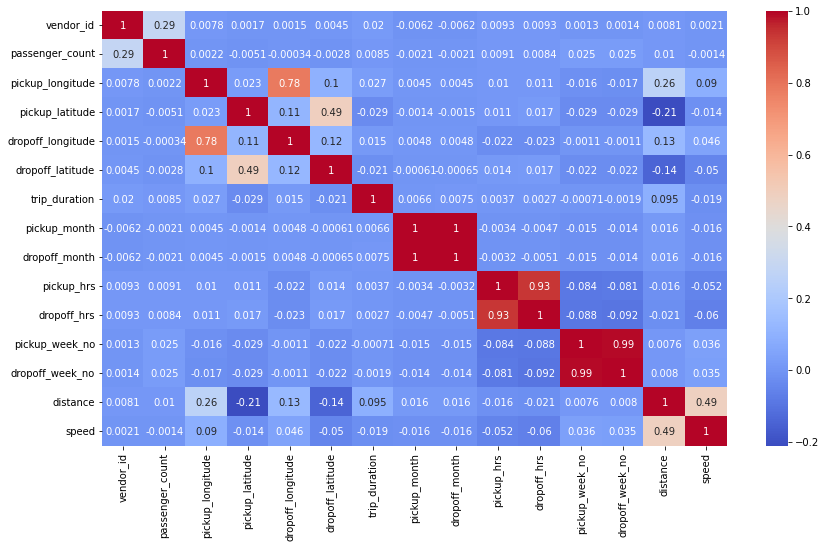

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [33]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,dropoff_month,pickup_hrs,dropoff_hrs,pickup_week_no,dropoff_week_no,distance,speed
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.516818e+00,3.517178e+00,1.360648e+01,1.359890e+01,3.050375e+00,3.054422e+00,3.440869e+00,1.442323e+01
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,1.681038e+00,1.681217e+00,6.399693e+00,6.483682e+00,1.954039e+00,1.956599e+00,4.296544e+00,1.497755e+01
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,2.000000e+00,2.000000e+00,9.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,1.231838e+00,9.121287e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,4.000000e+00,4.000000e+00,1.400000e+01,1.400000e+01,3.000000e+00,3.000000e+00,2.093720e+00,1.279200e+01
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,5.000000e+00,5.000000e+00,1.900000e+01,1.900000e+01,5.000000e+00,5.000000e+00,3.875343e+00,1.784494e+01
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,6.000000e+00,7.000000e+00,2.300000e+01,2.300000e+01,6.000000e+00,6.000000e+00,1.240910e+03,9.274850e+03


From the above description, we can see that max value of trip duration is much more compare to other data, and lot of inconsistency can be found in other featured data , so we need to remove all the inconsistent value one by one.

#Lets start with the targeted variable

In [34]:
#lets check the shape of the perticular column
df['trip_duration'].shape
# we can see that overall rows are around 1458644

(1458644,)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


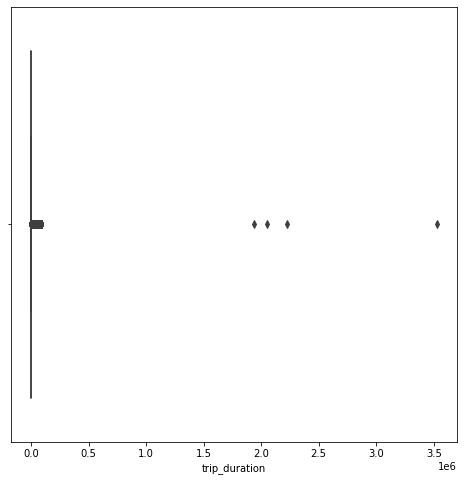

In [35]:
plt.figure(figsize=(8,8))
sns.boxplot(df['trip_duration'])
xlabel=('Trip duration')
plt.show()

In [36]:
#lets convert it into the list form and check the outliers , as shown on above box plot.
for i in range(0,100,10):
  duration=df['trip_duration'].values
  duration=np.sort(duration)
  print('{} percentile is {}'.format(i,int(df['trip_duration'].quantile(i/100))))
print('{} percentile is {}'.format(100,duration[-1]))

0 percentile is 1
10 percentile is 245
20 percentile is 348
30 percentile is 446
40 percentile is 548
50 percentile is 662
60 percentile is 798
70 percentile is 968
80 percentile is 1208
90 percentile is 1634
100 percentile is 3526282


In [37]:

for i in range(90,100,1):
  duration=df['trip_duration'].values
  duration=np.sort(duration)
  print('{} percentile is {}'.format(i,int(df['trip_duration'].quantile(i/100))))
print('{} percentile is {}'.format(100,duration[-1]))

90 percentile is 1634
91 percentile is 1703
92 percentile is 1780
93 percentile is 1869
94 percentile is 1975
95 percentile is 2104
96 percentile is 2273
97 percentile is 2497
98 percentile is 2829
99 percentile is 3440
100 percentile is 3526282


In [38]:
df.drop(df[df.trip_duration>=3400].index,inplace=True)

In [39]:
df.shape

(1443442, 23)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


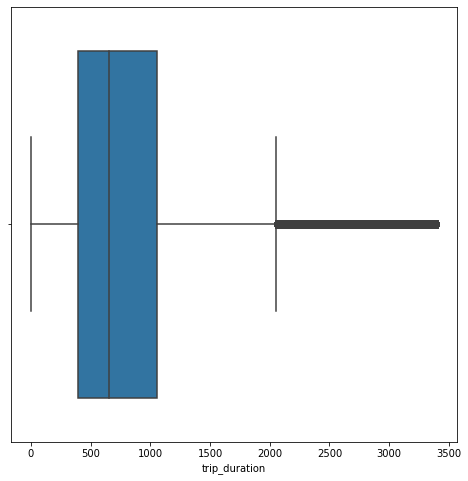

In [40]:
plt.figure(figsize=(8,8))
sns.boxplot(df['trip_duration'])
xlabel=('Trip duration')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


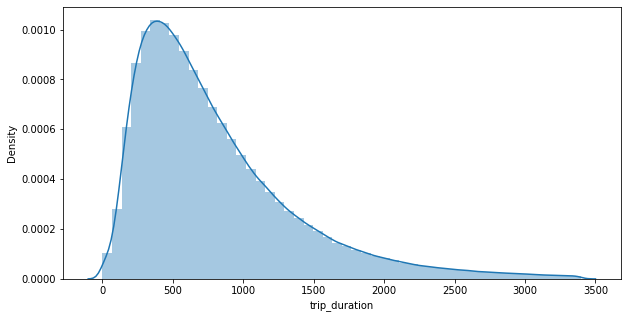

In [41]:
# Now checking for the DIstplot
plt.figure(figsize=(10,5))
sns.distplot(df['trip_duration'])
xlabel=('trip_duration')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


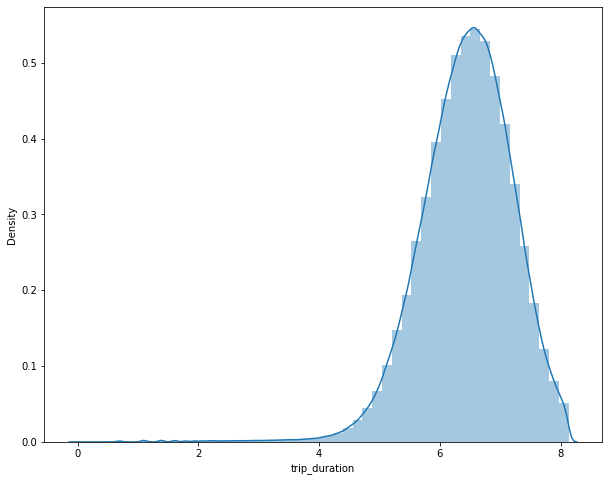

In [42]:
# Now checking for the DIstplot
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']))
xlabel=('trip_duration')

from the above, we can see that we got the almost normally distributed plot and we are ready to go ahead

Now , lets check for the time_of_day plot we created.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


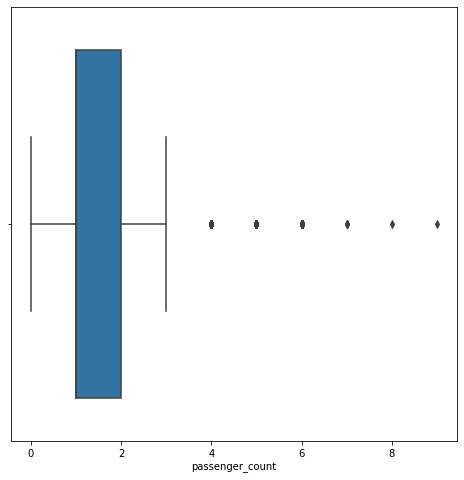

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot(df['passenger_count'])
xlabel=('Passenger_count')
plt.show()

In [44]:
df['passenger_count'].value_counts()

1    1023728
2     207553
5      77174
3      59182
6      47753
4      27988
0         59
7          3
9          1
8          1
Name: passenger_count, dtype: int64

from the above we can see that, Passenger count '0' seems wrong as well as we can count of 7,8,9 are relatively less so we can delete it

Now, Removing outliers for Distance

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


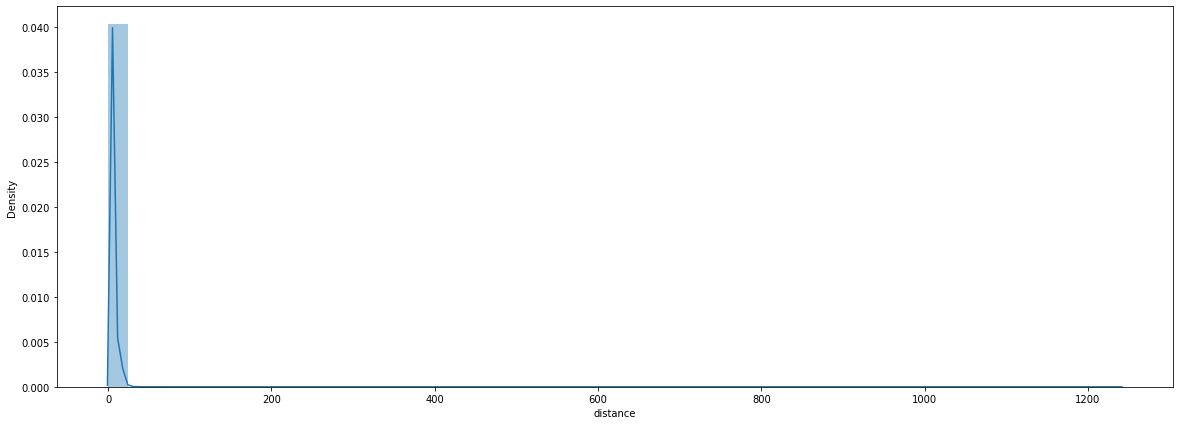

In [45]:
plt.figure(figsize = (20,7))
sns.distplot(df['distance'])
plt.xlabel('distance')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


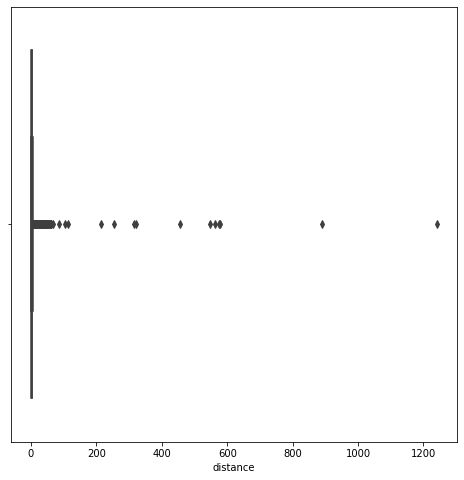

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(df['distance'])
xlabel=('distance')
plt.show()

In [47]:
df = df[df['distance'] > 0.05]

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


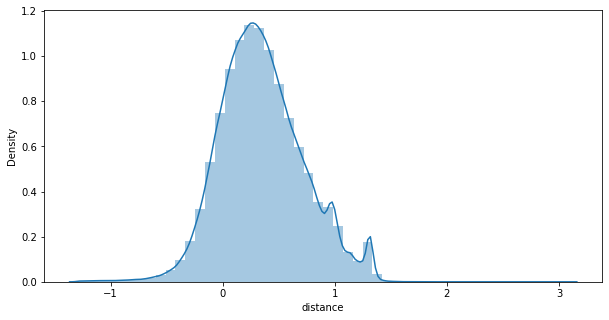

In [48]:
plt.figure(figsize = (10,5))
sns.distplot(np.log10(df['distance']))
plt.xlabel('distance')
plt.show()


In [49]:
df = df[df['distance'] <= 100]
df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_month,dropoff_month,pickup_hrs,dropoff_hrs,pickup_week_no,dropoff_week_no,distance,speed,pickup_time_of_day,dropoff_time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,3,3,17,17,0,0,1.498523,11.856445,evening,evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6,6,0,0,6,6,1.805510,9.803672,night,night
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,1,1,11,12,1,1,6.385107,10.822216,morning,afternoon
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4,4,19,19,2,2,1.485500,12.465738,evening,evening
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,3,3,13,13,5,5,1.188590,9.836608,afternoon,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,...,4,4,13,13,4,4,1.225082,5.668759,afternoon,afternoon
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,...,1,1,7,7,6,6,6.049844,33.251051,morning,morning
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,...,4,4,6,7,4,4,7.824617,36.869921,morning,morning
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,...,1,1,15,16,1,1,1.092565,10.544867,afternoon,evening


Now, lets check for the speed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


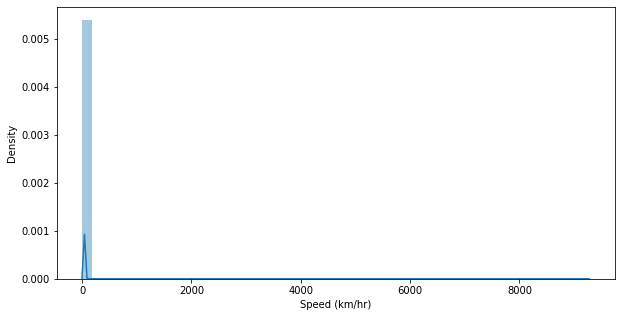

In [50]:
#Distribution plot of speed (km/hr)
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

In [51]:
df=df[df['speed']<50]
df=df.drop(df[df.speed<5].index)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


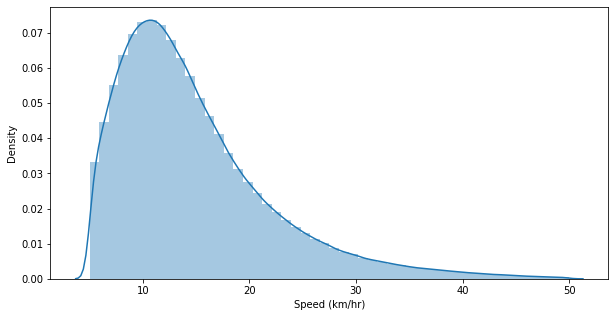

In [52]:
plt.figure(figsize = (10,5))
sns.distplot(df['speed'])
plt.xlabel('Speed (km/hr)')
plt.show()

Now, lets add Dummy feature data 

In [53]:
df = pd.get_dummies(df, columns=["store_and_fwd_flag", "pickup_time_of_day","dropoff_time_of_day"], prefix=["store", "pickup","dropoff"])

# check for the correlation

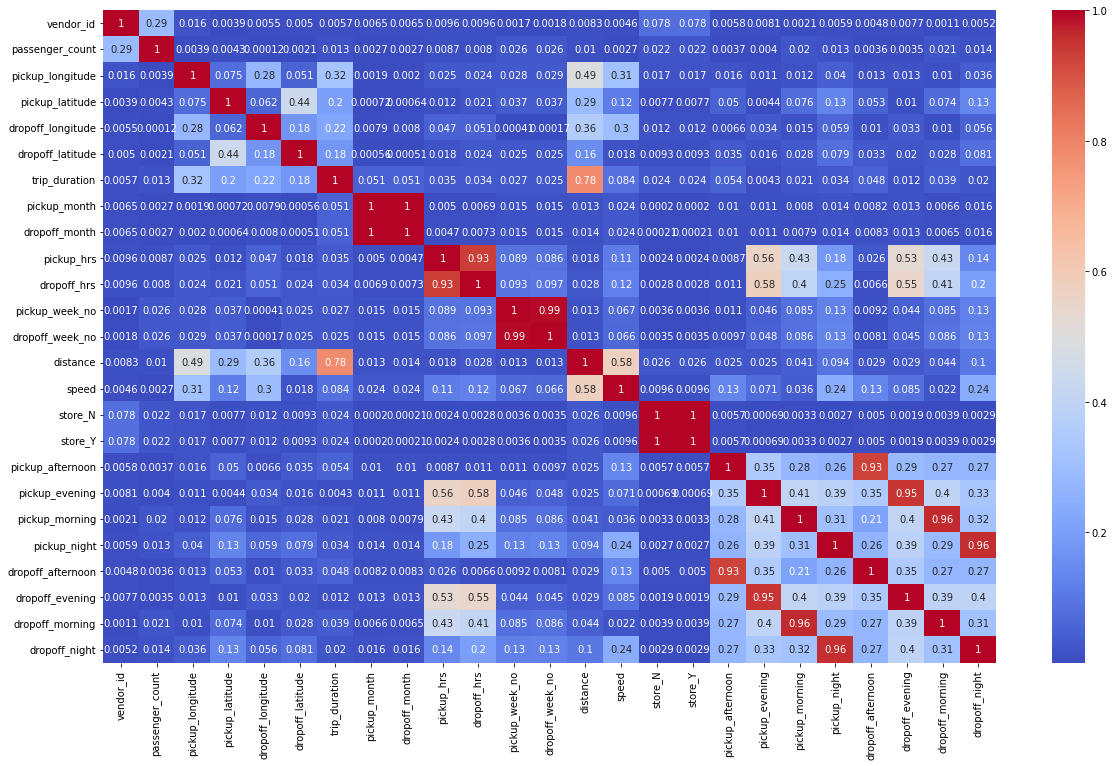

In [54]:
plt.figure(figsize=(20,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [55]:
df2=df.copy()
df2.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_month', 'dropoff_month', 'pickup_hrs',
       'dropoff_hrs', 'pickup_week_no', 'dropoff_week_no', 'distance', 'speed',
       'store_N', 'store_Y', 'pickup_afternoon', 'pickup_evening',
       'pickup_morning', 'pickup_night', 'dropoff_afternoon',
       'dropoff_evening', 'dropoff_morning', 'dropoff_night'],
      dtype='object')

In [56]:
# Lets Drop the features with high collinearity.
df2.drop(['dropoff_afternoon','dropoff_evening', 'dropoff_night', 'dropoff_morning','store_Y','store_N','dropoff_week_no',
              'pickup_evening','pickup_morning','dropoff_month','dropoff_hrs', 'id'],axis=1,inplace=True)

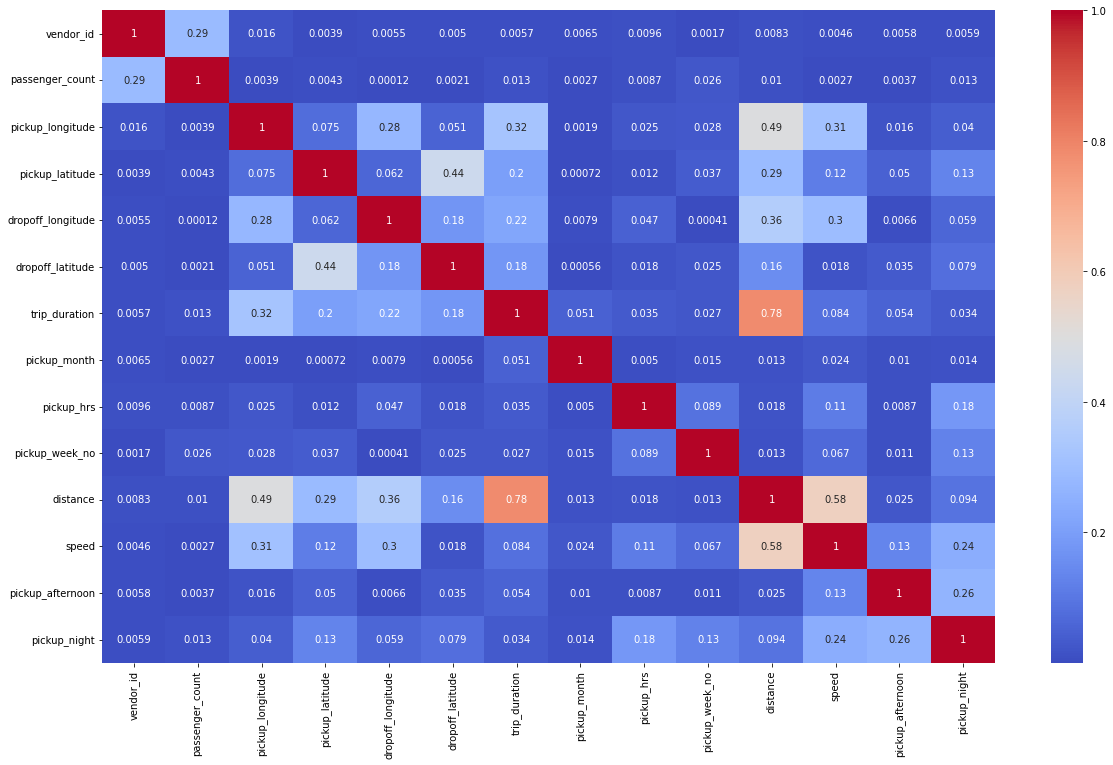

In [57]:
plt.figure(figsize=(20,12))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [58]:
# Now lets prepare data set for modelling

In [59]:
#creating Independent and dependent variables for modelling 
independent_variable=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','distance', 'pickup_hrs']
dependent_variable='trip_duration'

In [60]:
X=df2[independent_variable]
y=df2[dependent_variable]

In [61]:
# As we can see , some values have high value some has less , lets transform the data using min max scalar or std scalar
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [62]:
# Data transformation 
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [63]:
X[0:2,:]

array([[0.41523717, 0.4869924 , 0.37422942, 0.51964511, 0.03241097,
        0.73913043],
       [0.41679911, 0.44829874, 0.34865257, 0.46841353, 0.03927989,
        0.        ]])

In [64]:
# from the above , we can see that our Data is transformed

In [65]:
# Now lets Train the Data 
from sklearn.model_selection import train_test_split

In [66]:
# using train test split function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=3)

# **LINEAR REGRESSION APPLICATION**

In [67]:
# Importing the required library
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [68]:
# Now lets build linear regression model  

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [71]:
# lets check the score on train data set
lin_reg.score(X_train,y_train)

0.6300511644734687

In [72]:
# lets check the predicted value of train and test Data
y_pred_train=lin_reg.predict(X_train)
y_pred_test=lin_reg.predict(X_test)

In [106]:
# Create a fuction for calculation of train r2,MSE and Adj r2
def modelchecktrain(x,y):
  R2_score=r2_score(x,y)
  MSE=mean_squared_error(x,y)
  Adj_r2=mean_absolute_error(x,y)
  df3={'R2_score_train':R2_score,'Mean_Squared_error_train':MSE,'Abs_error':Adj_r2}
  return df3

def modelchecktest(x,y):
  R2_score=r2_score(x,y)
  MSE=mean_squared_error(x,y)
  Adj_r2=mean_absolute_error(x,y)
  df3={'R2_score_test':R2_score,'Mean_Squared_error_test':MSE,'Abs_error':Adj_r2}
  return df3


In [107]:
# Train R2_score , mean squared error and mean absolute error
modelchecktrain(y_train,y_pred_train)

{'R2_score_train': 0.6300511644734687,
 'Mean_Squared_error_train': 120551.03785996622,
 'Abs_error': 251.4041690606302}

In [108]:
# Train R2_score , mean squared error and mean absolute error
modelchecktest(y_test,y_pred_test)

{'R2_score_test': 0.6279374953455648,
 'Mean_Squared_error_test': 121725.08621804853,
 'Abs_error': 252.36971802165027}

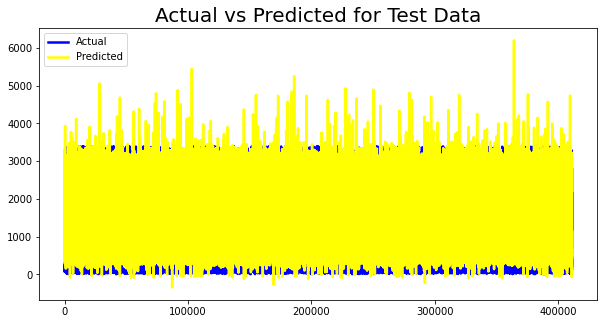

In [76]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [77]:
# well from the above , we can find that linear model doesnt give as expected result lets try using other models as well

# **DECISION TREE APPLICATION**

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
X_train.shape

(959926, 6)

In [80]:
# Max_depth
max_depth= [6,8,10]
# min_leaf
min_samples_leaf= [8,18,26]
# min_split
min_samples_split= [10,20,30]
# Hyperparameter grid
param_dt={'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [81]:
from sklearn.model_selection import GridSearchCV
dr=DecisionTreeRegressor()
grid_cv=GridSearchCV(estimator=dr,param_grid=param_dt,cv=5,verbose=2,scoring='r2')
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=10; total time=   3.5s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=10; total time=   3.7s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=10; total time=   3.6s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=10; total time=   3.8s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=10; total time=   3.5s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=20; total time=   3.8s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=20; total time=   3.7s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=20; total time=   3.6s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=20; total time=   3.6s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=20; total time=   3.7s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=30; total time=   3.8s
[CV] END max_depth=6, min

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [6, 8, 10],
                         'min_samples_leaf': [8, 18, 26],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [82]:
grid_cv.best_params_

{'max_depth': 10, 'min_samples_leaf': 26, 'min_samples_split': 10}

In [83]:
# Now lets consider the best parameters as above

In [84]:
y_pred_train_dr=grid_cv.predict(X_train)
y_pred_test_dr=grid_cv.predict(X_test)

In [109]:
modelchecktrain(y_train,y_pred_train_dr)

{'R2_score_train': 0.7698760175963903,
 'Mean_Squared_error_train': 74987.89630122845,
 'Abs_error': 193.77284392420975}

In [110]:
modelchecktest(y_test,y_pred_test_dr)

{'R2_score_test': 0.7642790800729558,
 'Mean_Squared_error_test': 77119.16396457859,
 'Abs_error': 195.97112222838155}

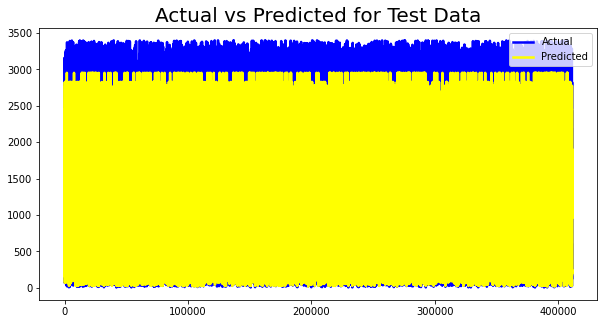

In [87]:
#Actual vs Prediction
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_dr, color='yellow', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

In [88]:
# from above we can find that , r2 score got improved from the linear regression one , but still lets try for another model

# **RANDOM FOREST APPLICATION**

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
from pandas.core.common import random_state
# Number of trees in random forest
n_estimators = [50,80,130]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,15]
# Minimum number of samples required to split a node
min_samples_split = [5,10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10,15]
# Method of selecting samples for training each tree
regressor=RandomForestRegressor()
# hyperparameter grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#grid search to find the best parameter
randfor=GridSearchCV(regressor,param_grid=random_grid,scoring='neg_mean_squared_error',verbose=2,cv=5)
randfor.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


KeyboardInterrupt: ignored

In [91]:
# Fitting Random Forest Regression to the dataset , consedring n_estimators = 50 as gridsearcv will take more time than required
forest_reg = RandomForestRegressor(n_estimators = 50, n_jobs = -4)

In [92]:
# Fit the object to train dataset
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, n_jobs=-4)

In [111]:
y_pred_forest_train = forest_reg.predict(X_train)
y_pred_forest_test = forest_reg.predict(X_test)

In [112]:
modelchecktrain(y_train,y_pred_forest_train)


{'R2_score_train': 0.9723540762566502,
 'Mean_Squared_error_train': 9008.664117336542,
 'Abs_error': 64.52331767240388}

In [113]:
modelchecktest(y_test,y_pred_forest_test)

{'R2_score_test': 0.8076407835797556,
 'Mean_Squared_error_test': 62932.81884273148,
 'Abs_error': 173.17562354611243}

# **XG BOOST APPLICATION**

In [97]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb


In [98]:
xgb_model = xgb.XGBRegressor(random_state=0, objective='reg:squarederror')
# We can find the hyperparameter by using gridsearchCV
param_tuning = {'learning_rate': [0.1, 0.2, 0.3],'max_depth': [5, 8, 10],'min_samples_' : [2,4,6],'n_estimators' : [100,200,300]}
xgb_model = GridSearchCV(xgb_model, param_grid = param_tuning,scoring = 'r2', cv=5,verbose=1,)
xgb_model.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


KeyboardInterrupt: ignored

In [99]:
# finding best params is possible but it would take much more time comparatively
# Lets lets consider sum assumptions for n_estimators, max_depth , min_samples and learning_rate
xgb_model = xgb.XGBRegressor()
grid_values = {'n_estimators' : [200], 'max_depth': [8],'min_samples_' : [4],'learning_rate' : [0.2]}
xgb_model = GridSearchCV(estimator = xgb_model, param_grid = grid_values, scoring = 'r2', cv=3,verbose=1)

In [100]:
xgb_model.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[20:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:24:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.2], 'max_depth': [8],
                         'min_samples_': [4], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [101]:
print('The R2 score using the same alpha is :', xgb_model.best_score_)

The R2 score using the same alpha is : 0.8154029473676969


In [102]:
xgb_model.best_params_

{'learning_rate': 0.2, 'max_depth': 8, 'min_samples_': 4, 'n_estimators': 200}

In [103]:
y_pred_xgb_train=xgb_model.predict(X_train)
y_pred_xgb_test=xgb_model.predict(X_test)

In [114]:
modelchecktrain(y_train,y_pred_xgb_train)

{'R2_score_train': 0.8380140916833007,
 'Mean_Squared_error_train': 52784.51367058567,
 'Abs_error': 161.38519770157706}

In [115]:
modelchecktest(y_test,y_pred_xgb_test)

{'R2_score_test': 0.8161685623762802,
 'Mean_Squared_error_test': 60142.845125225256,
 'Abs_error': 170.13443350120193}

In [116]:
#conclusion 

In [117]:
#from the above models , we can conclude that XG Boost is the best models for application as compare to other models.